In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv" , sep = ",")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## EDA 

In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated().sum()

18078

In [7]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

<BarContainer object of 2 artists>

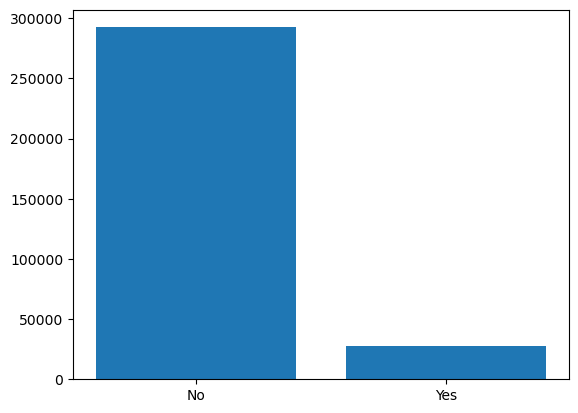

In [8]:
plt.bar(df['HeartDisease'].unique(),df['HeartDisease'].value_counts())

In [9]:
df= df.drop_duplicates()

<BarContainer object of 2 artists>

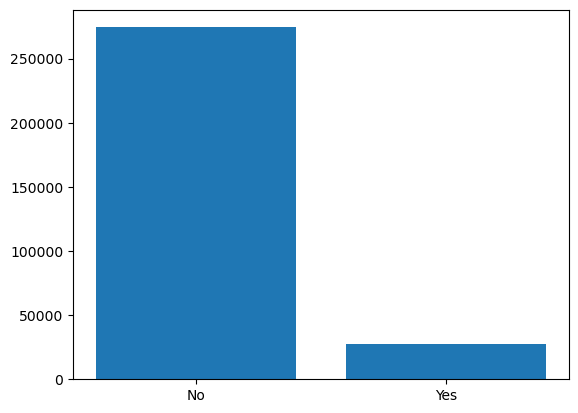

In [10]:
plt.bar(df['HeartDisease'].unique(),df['HeartDisease'].value_counts())

BMI                  Axes(0.125,0.798085;0.0824468x0.0819149)
PhysicalHealth    Axes(0.223936,0.798085;0.0824468x0.0819149)
MentalHealth      Axes(0.322872,0.798085;0.0824468x0.0819149)
SleepTime         Axes(0.421809,0.798085;0.0824468x0.0819149)
dtype: object

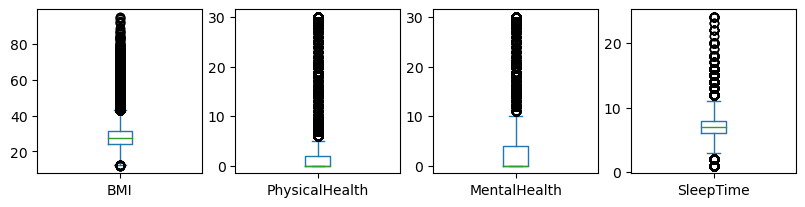

In [11]:
df.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (8,8))

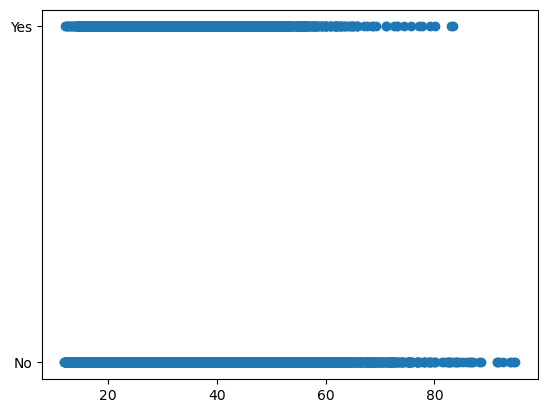

In [12]:
plt.scatter(df['BMI'], df['HeartDisease'])

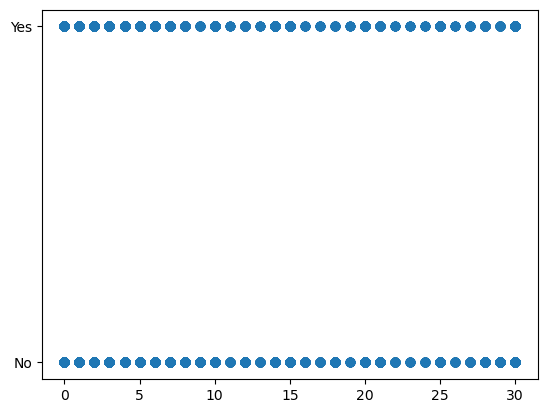

In [13]:
plt.scatter(df['PhysicalHealth'], df['HeartDisease'])

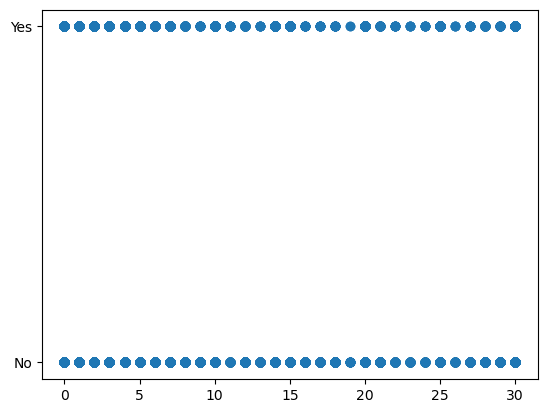

In [14]:
plt.scatter(df['MentalHealth'], df['HeartDisease'])

**Label Encoding**

In [15]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

**Applying Robust Scalar on outliers**

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)

**Train-Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = df.drop(["HeartDisease"] , axis = 1)
y = df["HeartDisease"].values

In [20]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [21]:
all_scores_decision_trees=[]
all_scores_random_forest=[]

In [22]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.9095926853950956
0.909810420257192


In [23]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68627
           1       0.00      0.00      0.00      6803

    accuracy                           0.91     75430
   macro avg       0.45      0.50      0.48     75430
weighted avg       0.83      0.91      0.87     75430



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.875, 'x[10] <= 1.5\ngini = 0.164\nsamples = 226287\nvalue = [205829, 20458]'),
 Text(0.25, 0.625, 'x[12] <= 0.5\ngini = 0.131\nsamples = 193842\nvalue = [180219, 13623]'),
 Text(0.125, 0.375, 'x[9] <= 4.5\ngini = 0.042\nsamples = 42986\nvalue = [42054, 932]'),
 Text(0.0625, 0.125, 'gini = 0.03\nsamples = 10674\nvalue = [10512, 162]'),
 Text(0.1875, 0.125, 'gini = 0.047\nsamples = 32312\nvalue = [31542, 770]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\ngini = 0.154\nsamples = 150856\nvalue = [138165, 12691]'),
 Text(0.3125, 0.125, 'gini = 0.123\nsamples = 128854\nvalue = [120367, 8487]'),
 Text(0.4375, 0.125, 'gini = 0.309\nsamples = 22002\nvalue = [17798, 4204]'),
 Text(0.75, 0.625, 'x[8] <= 7.5\ngini = 0.333\nsamples = 32445\nvalue = [25610, 6835]'),
 Text(0.625, 0.375, 'x[3] <= 0.5\ngini = 0.207\nsamples = 10888\nvalue = [9610, 1278]'),
 Text(0.5625, 0.125, 'gini = 0.177\nsamples = 10239\nvalue = [9235, 1004]'),
 Text(0.6875, 0.125, 'gini = 0.488\nsamples = 649\nvalue = [375, 27

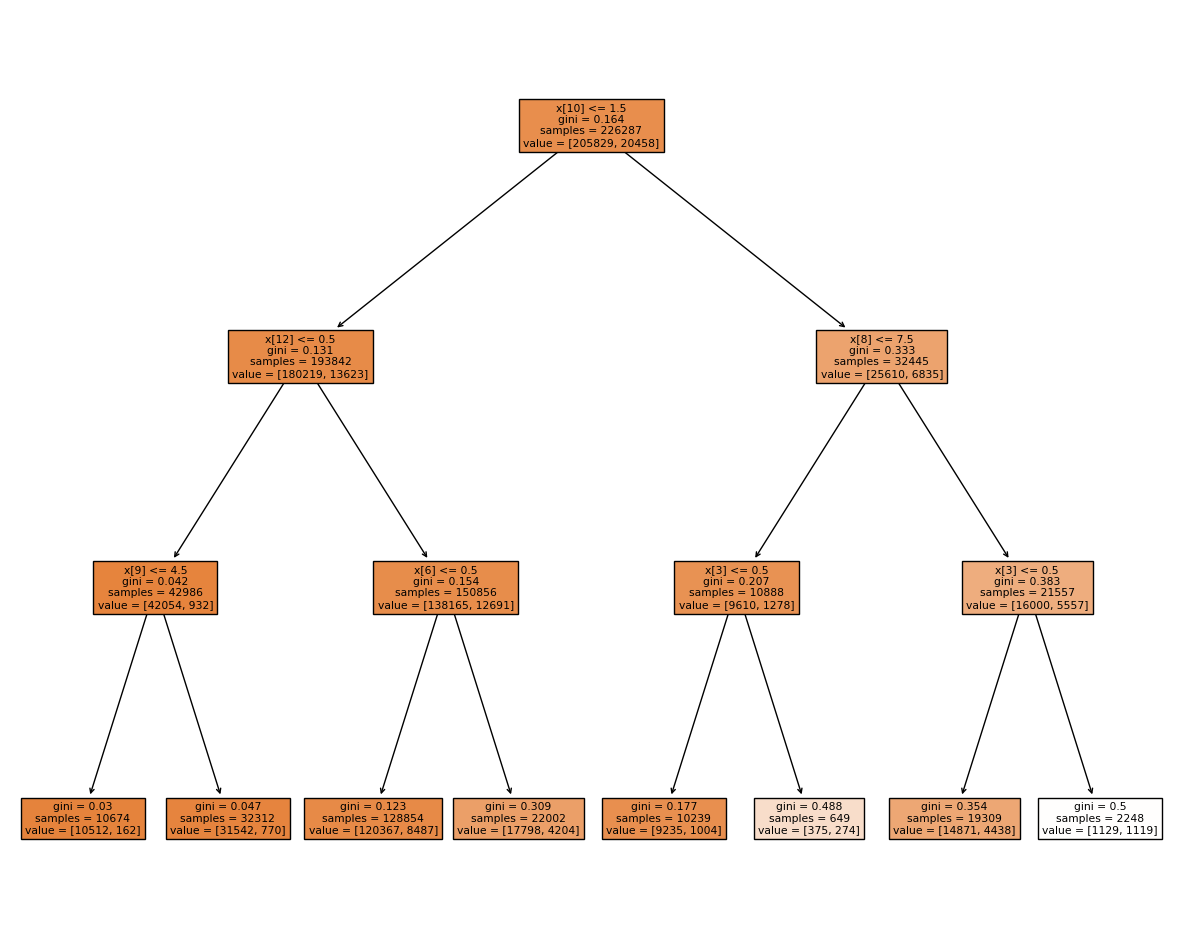

In [24]:
from sklearn import tree
fig = plt.figure(figsize= (15,12))
tree.plot_tree(dt , filled=True)

In [25]:
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.9095926853950956
0.909810420257192


In [26]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68627
           1       0.00      0.00      0.00      6803

    accuracy                           0.91     75430
   macro avg       0.45      0.50      0.48     75430
weighted avg       0.83      0.91      0.87     75430



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Handling Imbalanced Data

**1- Undersampling**

1.1 Near Miss Undersampling

In [27]:
from imblearn.under_sampling import NearMiss
undersampling = NearMiss(version = 1, n_neighbors = 3)

*1.1.1 version 1*

In [28]:
from collections import Counter 
X, Y = undersampling.fit_resample(x,y)
Counter(Y)

Counter({0: 27261, 1: 27261})

In [29]:
x_train , x_test , y_train ,y_test = train_test_split(X,Y , test_size= 0.25 , random_state= 42)

## Model 1

In [30]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.7966789758137488
0.7961264764140562


In [31]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      6811
           1       0.87      0.70      0.77      6820

    accuracy                           0.80     13631
   macro avg       0.81      0.80      0.79     13631
weighted avg       0.81      0.80      0.79     13631



In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.7963121469271967
0.7955395789010344


In [33]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      6811
           1       0.89      0.67      0.77      6820

    accuracy                           0.80     13631
   macro avg       0.82      0.80      0.79     13631
weighted avg       0.82      0.80      0.79     13631



*1.1.2 version 2*

In [34]:
x = df.drop(["HeartDisease"] , axis = 1)
y = df["HeartDisease"].values
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

*1.1.3 version 3*

In [35]:
undersampling3 = NearMiss(version = 3, n_neighbors = 3)
X3, Y3 = undersampling3.fit_resample(x,y)
Counter(Y3)

Counter({0: 27261, 1: 27261})

In [36]:
x_train , x_test , y_train ,y_test = train_test_split(X3,Y3 , test_size= 0.25 , random_state= 42)

In [37]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.6104766329999266
0.6122074682708532


In [38]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      6811
           1       0.64      0.51      0.57      6820

    accuracy                           0.61     13631
   macro avg       0.62      0.61      0.61     13631
weighted avg       0.62      0.61      0.61     13631



In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.685701010002201
0.6820482723204461


In [40]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      6811
           1       0.71      0.62      0.66      6820

    accuracy                           0.68     13631
   macro avg       0.68      0.68      0.68     13631
weighted avg       0.68      0.68      0.68     13631



1.2- Condensed Nearest Neighbor (CNN) Undersampling

1.3- Tomek Links Undersampling

In [41]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
X5, Y5= undersample.fit_resample(x, y)

Counter(Y5)

Counter({0: 265950, 1: 27261})

In [42]:
x_train , x_test , y_train ,y_test = train_test_split(X5,Y5, test_size= 0.25 , random_state= 42)

In [43]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.907179365916656
0.9088577547985758


In [44]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     66599
           1       0.53      0.03      0.06      6704

    accuracy                           0.91     73303
   macro avg       0.72      0.51      0.51     73303
weighted avg       0.88      0.91      0.87     73303



In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.906519999272423
0.9085439886498506


In [46]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     66599
           1       0.00      0.00      0.00      6704

    accuracy                           0.91     73303
   macro avg       0.45      0.50      0.48     73303
weighted avg       0.83      0.91      0.87     73303



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.4-Neighborhood Cleaning Undersampling

In [47]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

X6,Y6= undersample.fit_resample(x, y)
Counter(Y6)

Counter({0: 222379, 1: 27261})

In [48]:
x_train , x_test , y_train ,y_test = train_test_split(X6, Y6, test_size= 0.25 , random_state= 42)

In [49]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.8905410457725792
0.8915718634834161


In [50]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     55643
           1       0.00      0.00      0.00      6767

    accuracy                           0.89     62410
   macro avg       0.45      0.50      0.47     62410
weighted avg       0.79      0.89      0.84     62410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.892036532606954
0.8929658708540298


In [52]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     55643
           1       0.78      0.02      0.04      6767

    accuracy                           0.89     62410
   macro avg       0.84      0.51      0.49     62410
weighted avg       0.88      0.89      0.84     62410



1.5- Random undersampling

In [53]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()
X7,Y7= undersample.fit_resample(x, y)
Counter(Y7)

Counter({0: 222379, 1: 27261})

In [54]:
x_train , x_test , y_train ,y_test = train_test_split(X7, Y7, test_size= 0.25 , random_state= 42)

In [55]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.8922982428029697
0.8937510014420766


In [56]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     55643
           1       0.69      0.04      0.07      6767

    accuracy                           0.89     62410
   macro avg       0.79      0.52      0.51     62410
weighted avg       0.87      0.89      0.85     62410



In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.8905410457725792
0.8915718634834161


In [58]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     55643
           1       0.00      0.00      0.00      6767

    accuracy                           0.89     62410
   macro avg       0.45      0.50      0.47     62410
weighted avg       0.79      0.89      0.84     62410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2- Oversampling**

2.1- SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X8,Y8= oversample.fit_resample(x, y)
Counter(Y8)

Counter({0: 274456, 1: 274456})

In [60]:
x_train , x_test , y_train ,y_test = train_test_split(X8, Y8, test_size= 0.25 , random_state= 42)

In [61]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.6467509060347256
0.6453347713294663


In [62]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70     68436
           1       0.72      0.48      0.57     68792

    accuracy                           0.65    137228
   macro avg       0.66      0.65      0.64    137228
weighted avg       0.66      0.65      0.63    137228



In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.7270940818686177
0.7267540152155537


In [64]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.70     68436
           1       0.69      0.83      0.75     68792

    accuracy                           0.73    137228
   macro avg       0.74      0.73      0.72    137228
weighted avg       0.74      0.73      0.72    137228



2.2- Borderline-SMOTE

In [65]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X9,Y9= oversample.fit_resample(x, y)
Counter(Y9)

Counter({0: 274456, 1: 274456})

In [66]:
x_train , x_test , y_train ,y_test = train_test_split(X9, Y9, test_size= 0.25 , random_state= 42)

In [67]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.7086551821299832
0.7098478444632291


In [68]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63     68436
           1       0.65      0.91      0.76     68792

    accuracy                           0.71    137228
   macro avg       0.75      0.71      0.70    137228
weighted avg       0.75      0.71      0.70    137228



In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.7377673166797836
0.7370288862331302


In [70]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     68436
           1       0.72      0.77      0.75     68792

    accuracy                           0.74    137228
   macro avg       0.74      0.74      0.74    137228
weighted avg       0.74      0.74      0.74    137228



2.4- Adaptive Synthetic Sampling (ADASYN)

In [71]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X11,Y11= oversample.fit_resample(x, y)
Counter(Y11)

Counter({0: 274456, 1: 273062})

In [72]:
x_train , x_test , y_train ,y_test = train_test_split(X11, Y11, test_size= 0.25 , random_state= 42)

In [73]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.6526064319424895
0.6511689070718878


In [74]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.69     68333
           1       0.71      0.51      0.59     68547

    accuracy                           0.65    136880
   macro avg       0.67      0.65      0.64    136880
weighted avg       0.67      0.65      0.64    136880



In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.6992046522728047
0.6989260666277031


In [76]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     68333
           1       0.69      0.72      0.70     68547

    accuracy                           0.70    136880
   macro avg       0.70      0.70      0.70    136880
weighted avg       0.70      0.70      0.70    136880



2.5- Random Oversampling

In [77]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()
oversample = ADASYN()
X12,Y12= oversample.fit_resample(x, y)
Counter(Y12)

Counter({0: 274456, 1: 273062})

In [78]:
x_train , x_test , y_train ,y_test = train_test_split(X12, Y12, test_size= 0.25 , random_state= 42)

In [79]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.6383042972155524
0.6383109292811221


In [80]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61     68333
           1       0.62      0.70      0.66     68547

    accuracy                           0.64    136880
   macro avg       0.64      0.64      0.64    136880
weighted avg       0.64      0.64      0.64    136880



In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.6951865146430676
0.6940166569257744


In [82]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     68333
           1       0.69      0.70      0.70     68547

    accuracy                           0.69    136880
   macro avg       0.69      0.69      0.69    136880
weighted avg       0.69      0.69      0.69    136880



**3-Resampling (Oversampling and Undersampling)**

In [83]:
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [84]:
from sklearn.utils import resample
df_majority = df[(df['HeartDisease']==0)] 
df_minority = df[(df['HeartDisease']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42) 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled['HeartDisease'].value_counts()

0    274456
1    131177
Name: HeartDisease, dtype: int64

In [85]:
x = df_upsampled.drop(["HeartDisease"] , axis = 1)
y = df_upsampled["HeartDisease"].values

In [86]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [87]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.7193712527611233
0.7197980455383645


In [88]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     68603
           1       0.58      0.47      0.52     32806

    accuracy                           0.72    101409
   macro avg       0.68      0.65      0.66    101409
weighted avg       0.71      0.72      0.71    101409



In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.7296104186388976
0.7297281306392923


In [90]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.83     68603
           1       0.72      0.27      0.40     32806

    accuracy                           0.73    101409
   macro avg       0.72      0.61      0.61    101409
weighted avg       0.73      0.73      0.69    101409



**4-K-Fold Cross-Validation**

In [91]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=0)

for train_index, test_index in kf.split(x):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ros = RandomOverSampler(sampling_strategy='minority')
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

y_train_resampled

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
array = np.array(y_train_resampled) 

unique_values, counts = np.unique(array, return_counts=True)
unique_values

array([0, 1])

In [93]:
counts

array([219497, 219497])

In [94]:
x_train,y_train= X_train_resampled, y_train_resampled
x_test,y_test= X_test_resampled, y_test_resampled

In [95]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)
dt.fit(x_train , y_train)
all_scores_decision_trees.append(dt.score(x_test , y_test))
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))

0.710804703481141
0.7123946942266053


In [96]:
y_pred = dt.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.55      0.65     54959
           1       0.66      0.88      0.75     54959

    accuracy                           0.71    109918
   macro avg       0.74      0.71      0.70    109918
weighted avg       0.74      0.71      0.70    109918



In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)
rf.fit(x_train , y_train)
all_scores_random_forest.append(rf.score(x_test , y_test))
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))

0.7281967407299417
0.729152641059699


In [98]:
y_pred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.71     54959
           1       0.70      0.80      0.75     54959

    accuracy                           0.73    109918
   macro avg       0.73      0.73      0.73    109918
weighted avg       0.73      0.73      0.73    109918



**BalancedBaggingClassifier**
A classifier that includes an additional step to balance the training set at the time of fit for a given sampler

In [99]:
x = df.drop(["HeartDisease"] , axis = 1)
y = df["HeartDisease"].values
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [100]:
from imblearn.ensemble import BalancedBaggingClassifier
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)
preds = classifier.predict(x_test)

/opt/conda/lib/python3.10/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [101]:
BalancedBaggingScore = classifier.score(x_test , y_test)
BalancedBaggingScore

0.8969375580007954

In [102]:
y_pred = classifier.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     68627
           1       0.32      0.12      0.18      6803

    accuracy                           0.90     75430
   macro avg       0.62      0.55      0.56     75430
weighted avg       0.86      0.90      0.88     75430



In [103]:
tbl_feature_importance = pd.DataFrame({
    'Feature_Name' : x.columns,
    'Feature_Importance' : dt.feature_importances_
})

In [104]:
top_10_features = tbl_feature_importance.sort_values(by = 'Feature_Importance', ascending = False)
top_10_features

,Feature_Name,Feature_Importance
8,AgeCategory,0.454525
6,DiffWalking,0.262063
12,GenHealth,0.246163
10,Diabetic,0.012358
7,Sex,0.010112
3,Stroke,0.008991
1,Smoking,0.005788
11,PhysicalActivity,0.000000
15,KidneyDisease,0.000000
14,Asthma,0.000000


<Axes: xlabel='Feature_Name'>

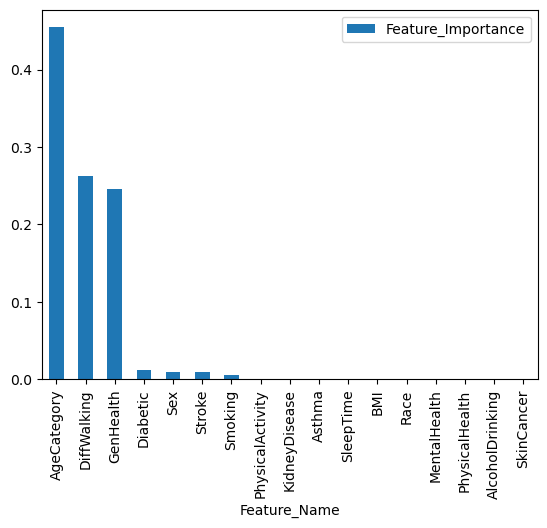

In [105]:
top_10_features.plot.bar('Feature_Name','Feature_Importance')

## Comparison of all models against each other

In [106]:
model_names_dt = ['Imbalanced', 'Near Miss Undersampling v1', 'Near Miss Undersampling v3','Tomek Links Undersampling','Neighborhood Cleaning Undersampling','Random undersampling','SMOTE','Borderline-SMOTE','Adaptive Synthetic Sampling (ADASYN)','Random Oversampling','Resampling Oversampling and Undersampling','K-Fold Cross-Validation','BalancedBaggingClassifier']
all_scores_decision_trees.append(BalancedBaggingScore)

In [107]:
len(all_scores_decision_trees)

13

In [108]:
len(model_names_dt)

13

In [109]:
color = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'pink', 'teal', 'lime', 'gray','yellow', 'gold']
len(color)

13

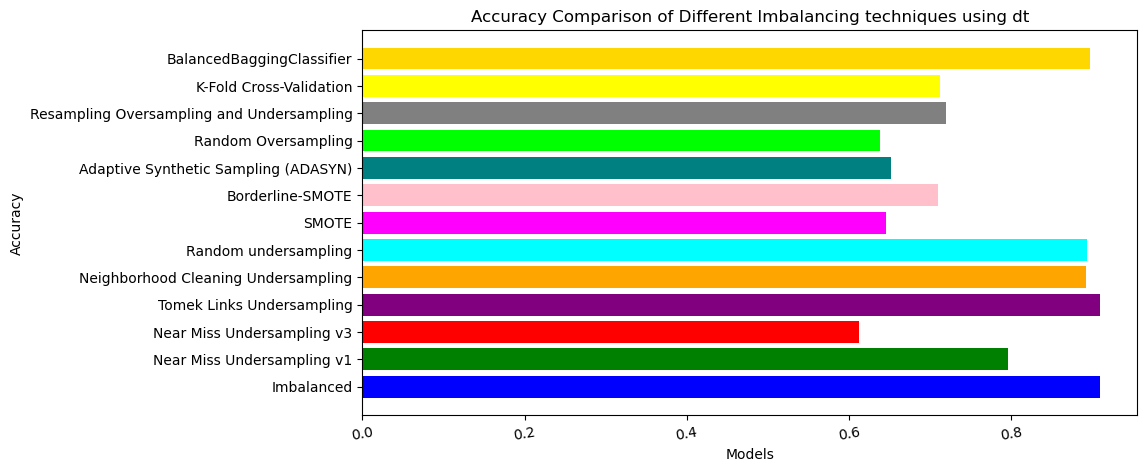

In [110]:
plt.figure(figsize=(10, 5))
plt.barh(model_names_dt , all_scores_decision_trees, color = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'pink', 'teal', 'lime', 'gray','yellow', 'gold'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=10)
plt.title('Accuracy Comparison of Different Imbalancing techniques using dt')
plt.show()


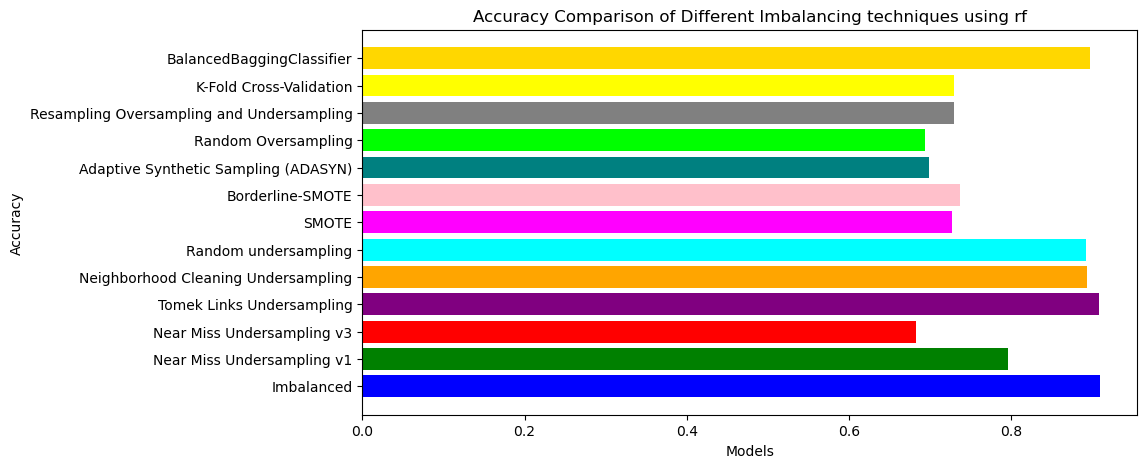

In [111]:
plt.figure(figsize=(10, 5))
all_scores_random_forest.append(BalancedBaggingScore)
plt.barh(model_names_dt,all_scores_random_forest,  color = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'pink', 'teal', 'lime', 'gray','yellow', 'gold'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Imbalancing techniques using rf')
plt.show()

In [112]:
results_df = pd.DataFrame({'Model': model_names_dt, 'Accuracy': all_scores_decision_trees})
results_df

,Model,Accuracy
0,Imbalanced,0.909810
1,Near Miss Undersampling v1,0.796126
2,Near Miss Undersampling v3,0.612207
3,Tomek Links Undersampling,0.908858
4,Neighborhood Cleaning Undersampling,0.891572
5,Random undersampling,0.893751
6,SMOTE,0.645335
7,Borderline-SMOTE,0.709848
8,Adaptive Synthetic Sampling (ADASYN),0.651169
9,Random Oversampling,0.638311


In [113]:
results_rf = pd.DataFrame({'Model': model_names_dt, 'Accuracy': all_scores_random_forest})
results_rf

,Model,Accuracy
0,Imbalanced,0.909810
1,Near Miss Undersampling v1,0.795540
2,Near Miss Undersampling v3,0.682048
3,Tomek Links Undersampling,0.908544
4,Neighborhood Cleaning Undersampling,0.892966
5,Random undersampling,0.891572
6,SMOTE,0.726754
7,Borderline-SMOTE,0.737029
8,Adaptive Synthetic Sampling (ADASYN),0.698926
9,Random Oversampling,0.694017


In [114]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [130]:
x = df.drop(["HeartDisease"] , axis = 1)
y = df["HeartDisease"]
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [138]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth =3, n_estimators=4, learning_rate=0.3)
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

0.909888769571385

In [139]:
xgb.score(x_test,y_test)

0.9101816253480047

In [140]:
from xgboost import plot_tree 

<Figure size 2000x1000 with 0 Axes>

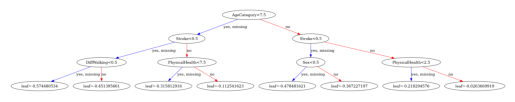

In [148]:
plt.figure(figsize=(20, 10))
plot_tree(xgb)
plt.show()